Weighted sum after input 0.5 and weight 0.2: 0.20
Weighted sum after input 0.3 and weight 0.3: 0.29
Weighted sum after input 0.7 and weight 0.6: 0.71
Output: True


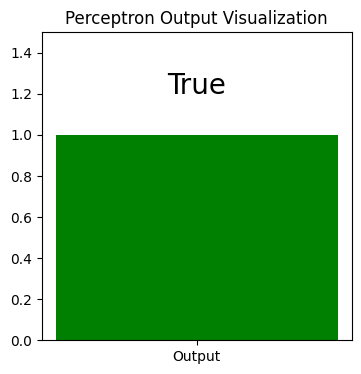

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# This perceptron model computes the weighted sum of the inputs and applies a step function (threshold) to determine output
# Set the input values, weights, bias, and threshold
x_input = [0.5, 0.3, 0.7]
w_weights = [0.2, 0.3, 0.6]
bias = 0.1  # Added bias term
threshold = 0.5

# Step function to return a binary decision
def step(weighted_sum):
    if weighted_sum > threshold:
        return True
    else:
        return False

# Perceptron function to compute weighted sum, add bias, and apply step function
def perceptron():
    weighted_sum = bias  # Start with the bias term
    for x, w in zip(x_input, w_weights):
        weighted_sum += x * w
        print(f"Weighted sum after input {x} and weight {w}: {weighted_sum:.2f}")
    return step(weighted_sum)

# Visualization function to show the output
def visualize_output(output):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Visualize output as a bar
    color = 'green' if output else 'red'
    ax.bar([0], [1], color=color, width=0.5)

    # Set labels and title
    ax.set_xticks([0])
    ax.set_xticklabels(['Output'])
    ax.set_ylim(0, 1.5)
    ax.set_title('Perceptron Output Visualization')

    # Text to display the output value
    ax.text(0, 1.2, 'True' if output else 'False', fontsize=20, color='black', ha='center')

    plt.show()

# Execute perceptron
output = perceptron()
print("Output:", output)

# Visualize the result
visualize_output(output)

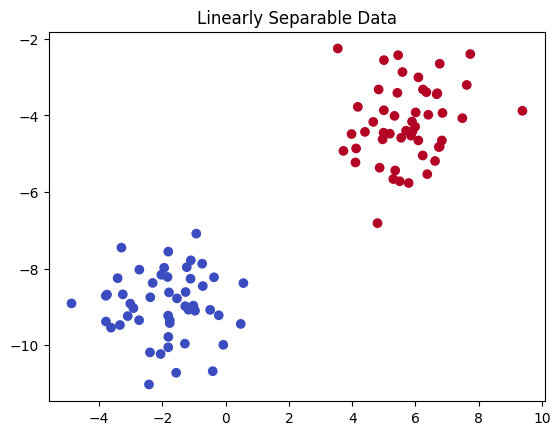

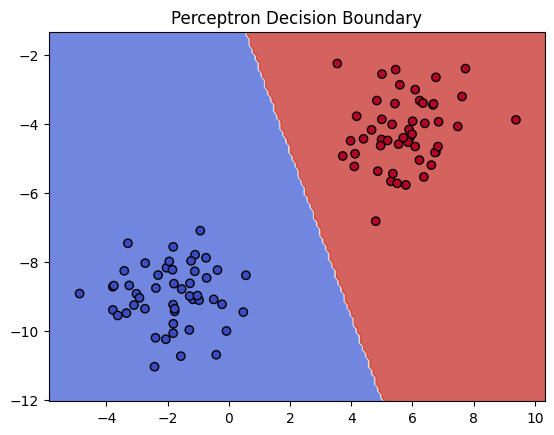

Accuracy: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# This code aims to generate a simple 2D linearly separable dataset
# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to -1 and 1 (Perceptron expects binary classification)
        y_ = np.where(y <= 0, -1, 1)

        # Training loop
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                prediction = np.sign(linear_output)

                # Update the weights and bias if prediction is wrong
                if y_[idx] * prediction <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Create a dataset (linearly separable)
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)

# Convert labels to 0 and 1 for simplicity
y = np.where(y == 0, 0, 1)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Linearly Separable Data")
plt.show()

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, perceptron)

# Predictions and accuracy
predictions = perceptron.predict(X)
accuracy = np.mean(predictions == np.where(y <= 0, -1, 1))
print(f"Accuracy: {accuracy * 100:.2f}%")